# Activités du grain 02

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Test de personnalité 

In [2]:
enquete = pd.read_csv("./Data/enquete.csv")

In [3]:
enquete.head()

,Unnamed: 0,Bou,Jog,Roc,Bio,Equi
0,Lara,0,10,2,3,6
1,Eric,8,4,2,2,2
2,Harald,0,3,10,0,0
3,Flora,2,3,1,9,4


In [4]:
enquete.rename(columns={'Unnamed: 0': 'Nom'}, inplace=True)

### Matrice des distances euclidiennes

In [5]:
X = enquete.loc[:, "Bou":].to_numpy()

In [6]:
D = pd.concat([enquete.Nom, pd.DataFrame(scipy.spatial.distance_matrix(X, X), columns=enquete.Nom)], axis=1)

In [7]:
D

,Nom,Lara,Eric,Harald,Flora
0,Lara,0.000000,10.816654,12.569805,9.695360
1,Eric,10.816654,0.000000,11.704700,9.539392
2,Harald,12.569805,11.704700,0.000000,13.490738
3,Flora,9.695360,9.539392,13.490738,0.000000


### Norme du vecteur des réponses

In [8]:
pd.concat([enquete.Nom, pd.DataFrame(np.sqrt(np.square(X).sum(axis=1)))], axis=1)

,Nom,0
0,Lara,12.206556
1,Eric,9.591663
2,Harald,10.440307
3,Flora,10.535654


# Spectres visible - proche infrarouge - de farines de blé

In [9]:
xfarines = pd.read_csv("./Data/x_140farines.csv")
yfarines = pd.read_csv("./Data/y_140farines.csv")

In [10]:
xfarines.head()

,\,400,404,408,412,416,420,424,428,432,...,2460,2464,2468,2472,2476,2480,2484,2488,2492,2496
0,3T1A1,0.2195,0.2254,0.2296,0.2326,0.2342,0.2354,0.2348,0.2337,0.2320,...,0.5378,0.5439,0.5496,0.5548,0.5591,0.5625,0.5650,0.5665,0.5672,0.5672
1,3T1A2,0.2166,0.2222,0.2262,0.2290,0.2308,0.2316,0.2309,0.2299,0.2282,...,0.5290,0.5351,0.5408,0.5459,0.5502,0.5536,0.5561,0.5577,0.5583,0.5583
2,3T1H1,0.2261,0.2327,0.2369,0.2398,0.2414,0.2418,0.2410,0.2395,0.2374,...,0.5507,0.5567,0.5623,0.5673,0.5715,0.5748,0.5771,0.5786,0.5793,0.5792
3,3T1H2,0.2314,0.2377,0.2417,0.2444,0.2458,0.2461,0.2451,0.2433,0.2408,...,0.5468,0.5527,0.5582,0.5632,0.5673,0.5705,0.5728,0.5742,0.5749,0.5749
4,3T2A1,0.2378,0.2438,0.2480,0.2507,0.2519,0.2523,0.2509,0.2493,0.2470,...,0.5838,0.5904,0.5965,0.6020,0.6067,0.6104,0.6129,0.6146,0.6153,0.6153


In [11]:
yfarines.head()

,,PROTREF,dur/tendre
0,3T1A1,8.9,T
1,3T1A2,8.7,T
2,3T1H1,11.6,T
3,3T1H2,12.7,T
4,3T2A1,9.1,T


### Fusion et nettoyage des données

In [12]:
xfarines.rename(columns={'\\': 'Farine'}, inplace=True)

In [13]:
farines = pd.concat([xfarines, yfarines], axis=1).drop('  ', axis=1)

In [14]:
farines.head()

,Farine,400,404,408,412,416,420,424,428,432,...,2468,2472,2476,2480,2484,2488,2492,2496,PROTREF,dur/tendre
0,3T1A1,0.2195,0.2254,0.2296,0.2326,0.2342,0.2354,0.2348,0.2337,0.2320,...,0.5496,0.5548,0.5591,0.5625,0.5650,0.5665,0.5672,0.5672,8.9,T
1,3T1A2,0.2166,0.2222,0.2262,0.2290,0.2308,0.2316,0.2309,0.2299,0.2282,...,0.5408,0.5459,0.5502,0.5536,0.5561,0.5577,0.5583,0.5583,8.7,T
2,3T1H1,0.2261,0.2327,0.2369,0.2398,0.2414,0.2418,0.2410,0.2395,0.2374,...,0.5623,0.5673,0.5715,0.5748,0.5771,0.5786,0.5793,0.5792,11.6,T
3,3T1H2,0.2314,0.2377,0.2417,0.2444,0.2458,0.2461,0.2451,0.2433,0.2408,...,0.5582,0.5632,0.5673,0.5705,0.5728,0.5742,0.5749,0.5749,12.7,T
4,3T2A1,0.2378,0.2438,0.2480,0.2507,0.2519,0.2523,0.2509,0.2493,0.2470,...,0.5965,0.6020,0.6067,0.6104,0.6129,0.6146,0.6153,0.6153,9.1,T


### Courbe du Spectre Moyen

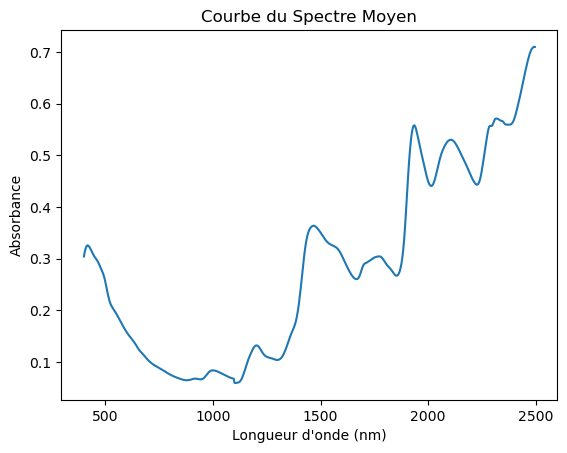

In [23]:
# Courbe du Spectre Moyen

x = farines.columns[1:-2].to_numpy(dtype='float64')
y = farines.iloc[:, 1:-2].mean().to_numpy(dtype='float64')

plt.plot(x,y)
plt.title("Courbe du Spectre Moyen")
plt.xlabel("Longueur d'onde (nm)")
plt.ylabel("Absorbance")
plt.show()

### Courbe des Ecart-Types

In [22]:
# Courbe des Ecart-Types

x = xfarines.columns[1:-2].to_numpy(dtype='float64')
y = xfarines.loc[:, 1:-2].std().to_numpy(dtype='float64')

plt.plot(x,y)
plt.title("Courbe des Ecart-Types")
plt.xlabel("Longueur d'onde (nm)")
plt.ylabel("Absorbance")
plt.show()

TypeError: cannot do slice indexing on Index with these indexers [1] of type int

###  Corrélogramme

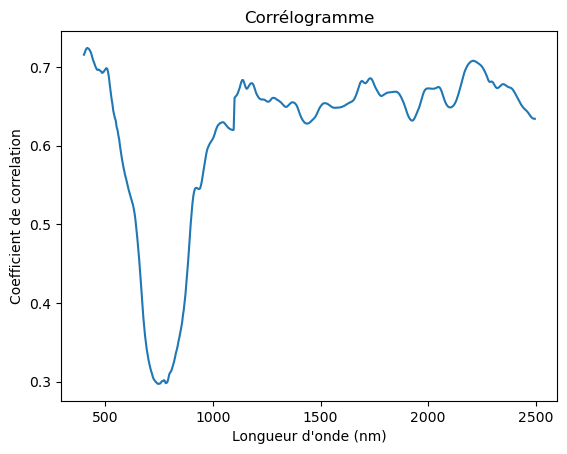

In [17]:
#  Corrélogramme

x = farines.columns[1:-2].to_numpy(dtype='float64')
y = np.array([np.corrcoef(farines[col], farines.PROTREF)[0, 1] for col in farines.columns[1:-2]])

plt.plot(x,y)
plt.title("Corrélogramme")
plt.xlabel("Longueur d'onde (nm)")
plt.ylabel("Coefficient de correlation")
plt.show()

### Histogramme de la variable « protéines »

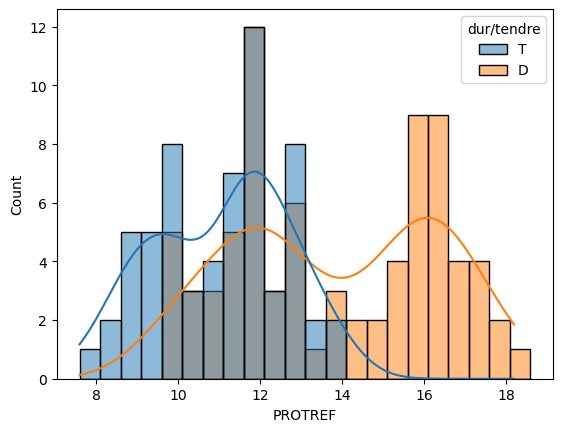

In [18]:
sns.histplot(data=farines, x="PROTREF", hue="dur/tendre", kde=True, binwidth=0.5)
plt.show()

### Histogramme de la longueur d’onde 2000 nanomètres.

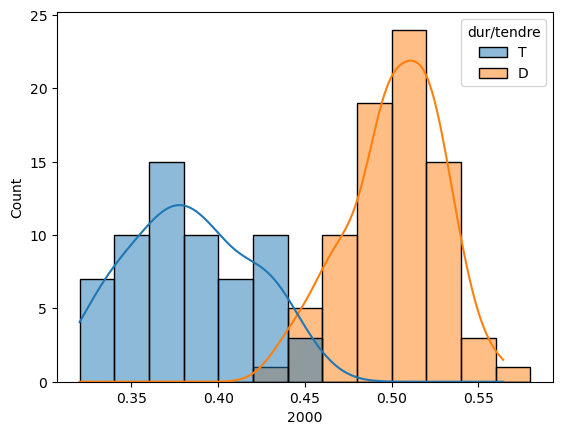

In [19]:
sns.histplot(data=farines, x="2000", hue="dur/tendre", kde=True, binwidth=0.02)
plt.show()